In [1]:
# Load libraries
import sys
import sys
sys.path.append("../../../xapres_package/")
import ApRESDefs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import pickle

import xarray as xr
import importlib
import pandas as pd
import math
from datetime import datetime, timedelta, date
from scipy.stats import linregress
from helpers import *

importlib.reload(ApRESDefs)
xa = ApRESDefs.xapres(loglevel='debug')

DEBUG    18:09:27 	 ApRESDefs.py @function _setup_logging line 615 - Stream logging level set to DEBUG
DEBUG    18:09:27 	 ApRESDefs.py @function _setup_logging line 616 - Add console handler to logger
DEBUG    18:09:27 	 ApRESDefs.py @function _setup_logging line 629 - File logging level set to DEBUG


In [2]:
def load_temp_csv(file):
    data = pd.read_csv(file)
    times = pd.to_datetime(data['Date-Time (Greenland Standard Time)'])
    times_utc = times + timedelta(hours=2)
    temps = data[data.columns[2]]
    return times_utc,temps


In [3]:
# Load data
ds_11 = reload("A101")
ds_11 = ds_11.isel(time=range(20,len(ds_11.time))) # trim first few bursts, which were tests
ds_11_w = reload_winter("A101")
ds_11_s = reload_summer("A101")

ds_13 = reload("A103_fixed")
ds_13 = ds_13.isel(time=range(60,len(ds_13.time))) # trim first few bursts, which were tests
ds_13_w = reload_winter("A103")
ds_13_s = reload_summer("A103")
ds_13_s = ds_13_s.isel(time=range(100,len(ds_13_s.time)))

ds_14 = reload("A104")
ds_14 = ds_14.isel(time=range(50,len(ds_14.time))) # trim first few bursts, which were tests
ds_14_w = reload_winter("A104")
ds_14_s = reload_summer("A104")


In [4]:
def load_temps(ds):
    temp1 = ds.temperature_1
    true_temp1 = temp1.where(lambda x: x<300, temp1-512).compute()
    
    temp2 = ds.temperature_2
    true_temp2 = temp2.where(lambda x: x<300, temp2-512).compute()
    return (true_temp2+true_temp1)/2

In [5]:
winter_time,winter_temp = load_temp_csv('TS08 2023-05-19 11_07_36.csv')

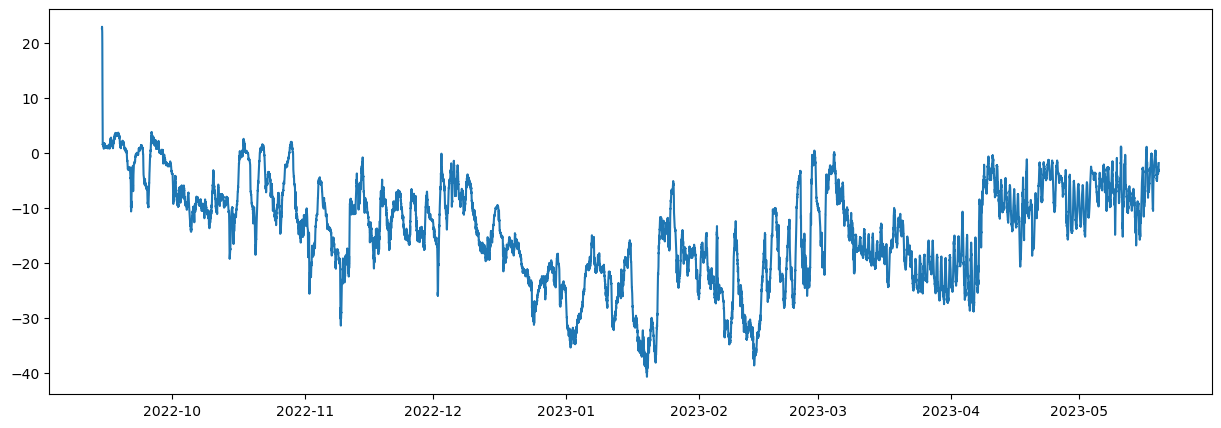

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(winter_time.values,winter_temp.values)

In [7]:
summer_time,summer_temp = load_temp_csv('TS08 2023-08-23 15_42_21.csv')
summer_time1,summer_temp1 = load_temp_csv('TS09 2023-09-01 12_56_05.csv')

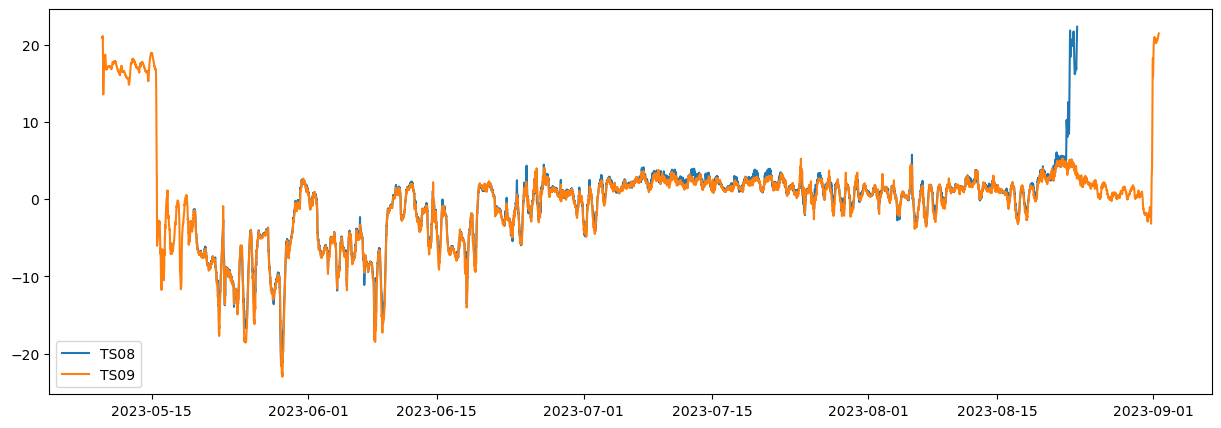

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(summer_time.values,summer_temp.values, label='TS08')
plt.plot(summer_time1.values,summer_temp1.values, label='TS09')
plt.legend()

In [9]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:44869")
client

<Client: 'tcp://127.0.0.1:44869' processes=4 threads=16, memory=125.80 GiB>

In [10]:
def load_v_t(ds):
    voltage = ds.battery_voltage.compute()
    temp1 = ds.temperature_1
    true_temp1 = temp1.where(lambda x: x<300, temp1-512).compute()
    
    temp2 = ds.temperature_2
    true_temp2 = temp2.where(lambda x: x<300, temp2-512).compute()
    return voltage, true_temp1, true_temp2

In [11]:
v11,t11_1,t11_2 = load_v_t(ds_11_w)

(-20.0, 10.0)

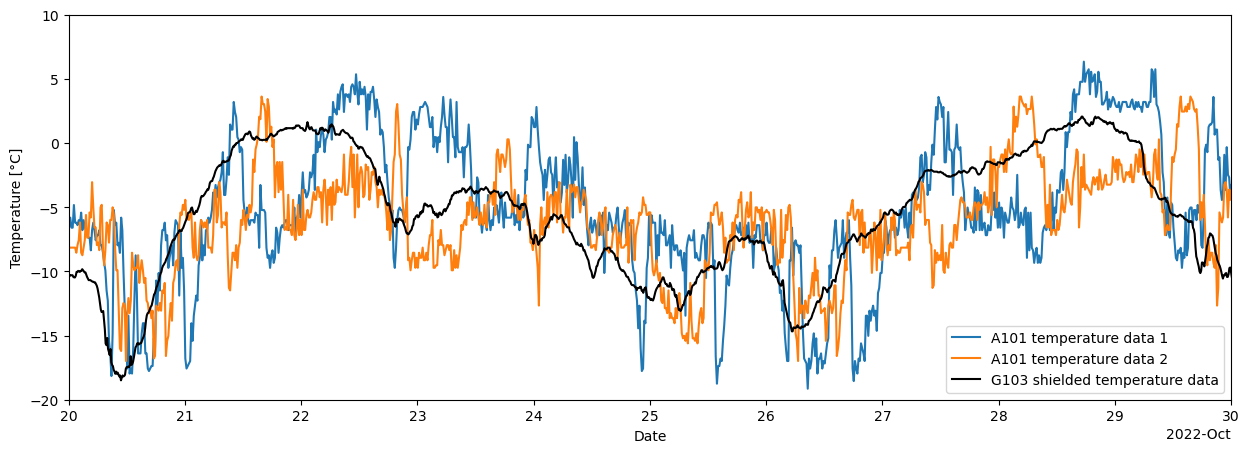

In [12]:
fig, ax = plt.subplots(figsize=(15,5))
t11_1.plot(label='A101 temperature data 1')
t11_2.plot(label='A101 temperature data 2')
plt.plot(winter_time.values,winter_temp.values,color='k',label='G103 shielded temperature data')

ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°C]')
#((t11_1+t11_2)/2).plot()
ax.set_xlim([date(2022, 10, 20), date(2022, 10, 30)])
ax.set_ylim([-20,10])

Text(0, 0.5, 'Temperature [°C]')

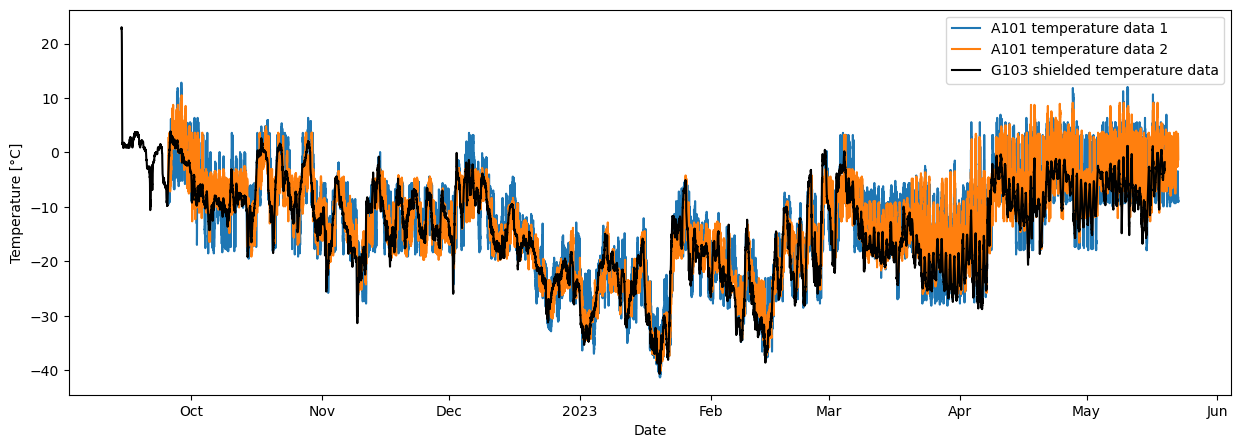

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
t11_1.plot(label='A101 temperature data 1')
t11_2.plot(label='A101 temperature data 2')
plt.plot(winter_time.values,winter_temp.values,color='k',label='G103 shielded temperature data')

ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°C]')
#((t11_1+t11_2)/2).plot()


(-20.0, 10.0)

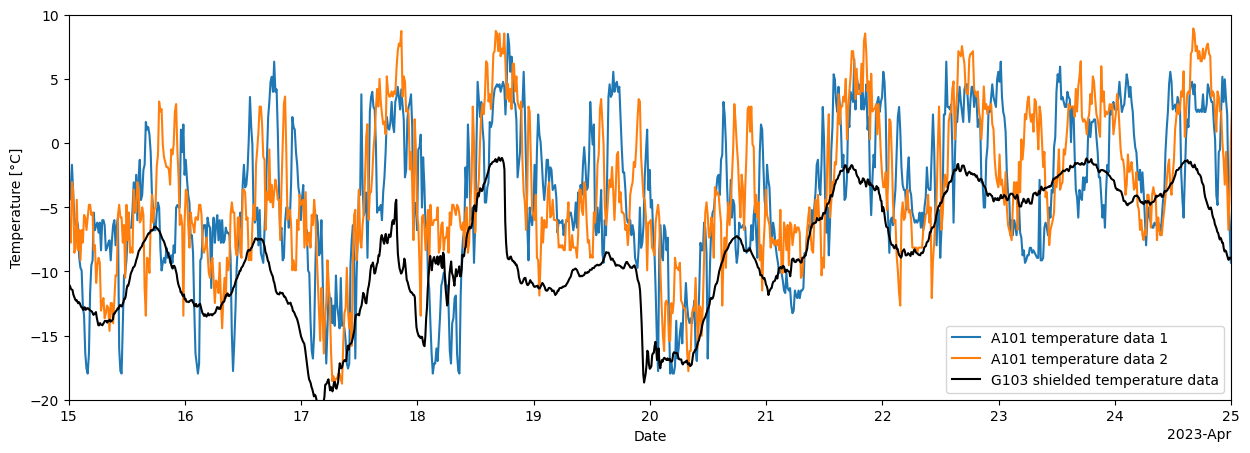

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
t11_1.plot(label='A101 temperature data 1')
t11_2.plot(label='A101 temperature data 2')
plt.plot(winter_time.values,winter_temp.values,color='k',label='G103 shielded temperature data')

ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°C]')
#((t11_1+t11_2)/2).plot()
ax.set_xlim([date(2023, 4, 15), date(2023, 4, 25)])
ax.set_ylim([-20,10])

In [15]:
v13,t13_1,t13_2 = load_v_t(ds_13_w)

Text(0, 0.5, 'Temperature [°C]')

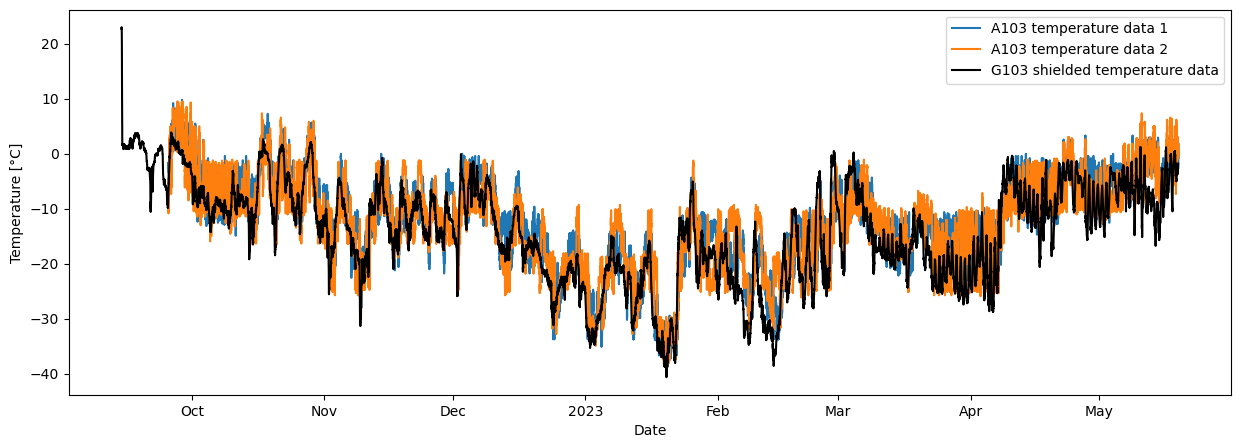

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
t13_1.plot(label='A103 temperature data 1')
t13_2.plot(label='A103 temperature data 2')
plt.plot(winter_time.values,winter_temp.values,color='k',label='G103 shielded temperature data')

#((t13_1+t13_2)/2).plot()
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°C]')

Text(0, 0.5, 'Temperature [°C]')

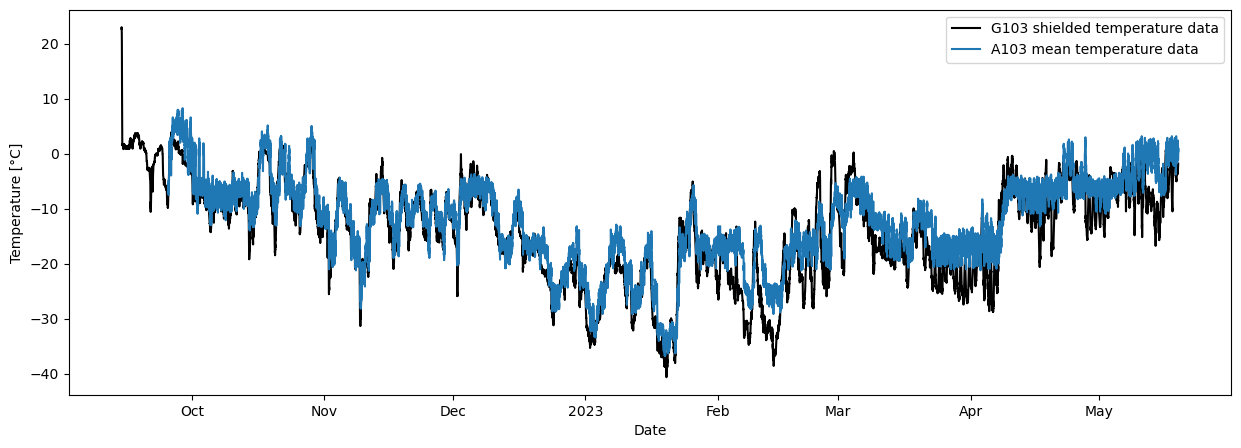

In [17]:
fig, ax = plt.subplots(figsize=(15,5))

plt.plot(winter_time.values,winter_temp.values,color='k',label='G103 shielded temperature data')

((t13_1+t13_2)/2).plot(label='A103 mean temperature data')
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°C]')

Text(0, 0.5, 'Temperature [°C]')

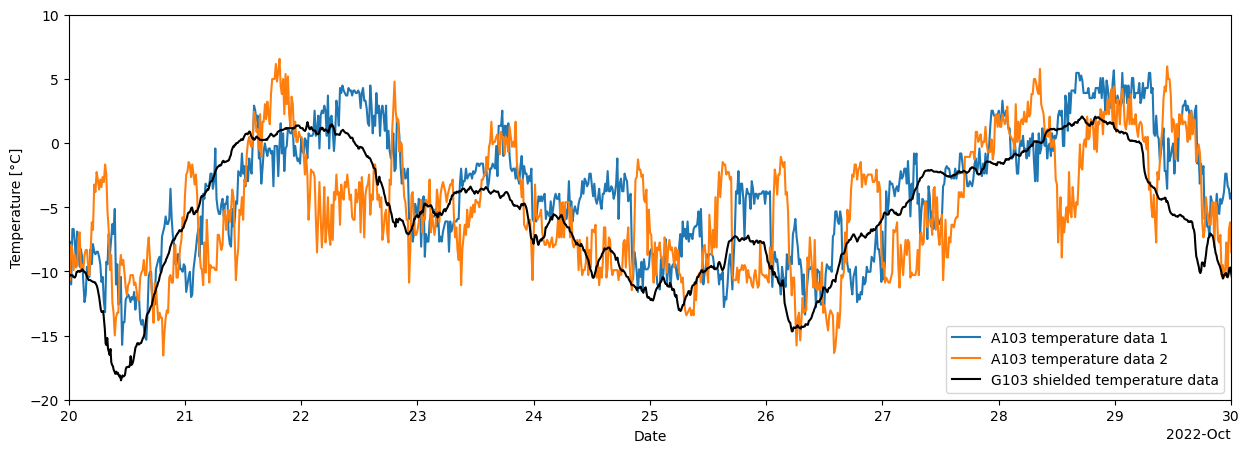

In [18]:
fig, ax = plt.subplots(figsize=(15,5))
t13_1.plot(label='A103 temperature data 1')
t13_2.plot(label='A103 temperature data 2')
plt.plot(winter_time.values,winter_temp.values,color='k',label='G103 shielded temperature data')

#((t13_1+t13_2)/2).plot(label='A103 mean temperature data')
ax.set_xlim([date(2022, 10, 20), date(2022, 10, 30)])
ax.set_ylim([-20,10])
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°C]')

Text(0, 0.5, 'Temperature [°C]')

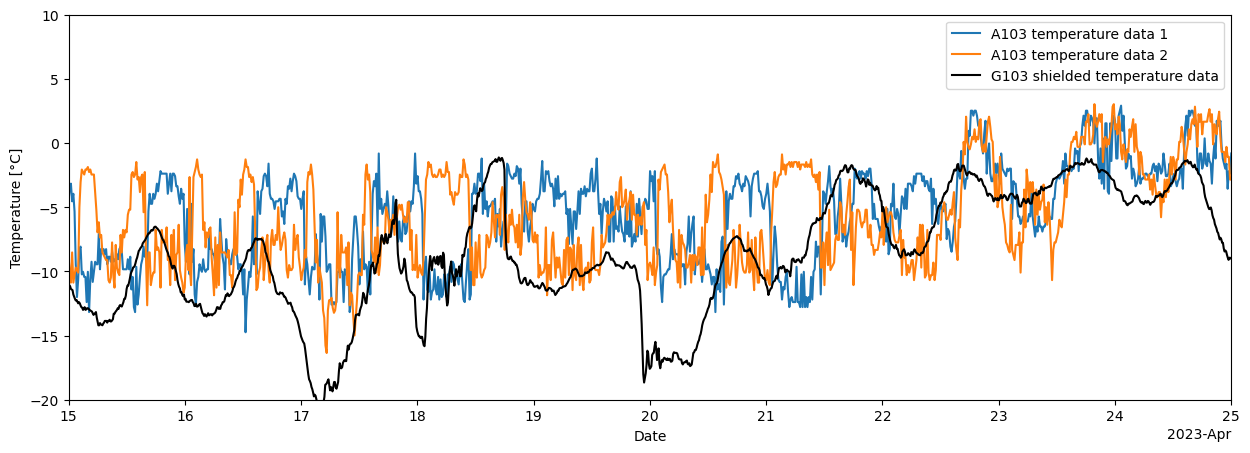

In [19]:
fig, ax = plt.subplots(figsize=(15,5))
t13_1.plot(label='A103 temperature data 1')
t13_2.plot(label='A103 temperature data 2')
plt.plot(winter_time.values,winter_temp.values,color='k',label='G103 shielded temperature data')

#((t13_1+t13_2)/2).plot(label='A103 mean temperature data')
ax.set_xlim([date(2023, 4, 15), date(2023, 4, 25)])
ax.set_ylim([-20,10])
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°C]')

Slight lag but broader trends seem to generally track

Check summer

In [20]:
v13,t13_1,t13_2 = load_v_t(ds_13_s)

/srv/conda/envs/notebook/lib/python3.11/site-packages/distributed/client.py:3161: UserWarning: Sending large graph of size 13.89 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.11/site-packages/distributed/client.py:3161: UserWarning: Sending large graph of size 13.97 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.11/site-packages/distributed/client.py:3161: UserWarning: Sending large graph of size 13.97 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


Text(0, 0.5, 'Temperature [°C]')

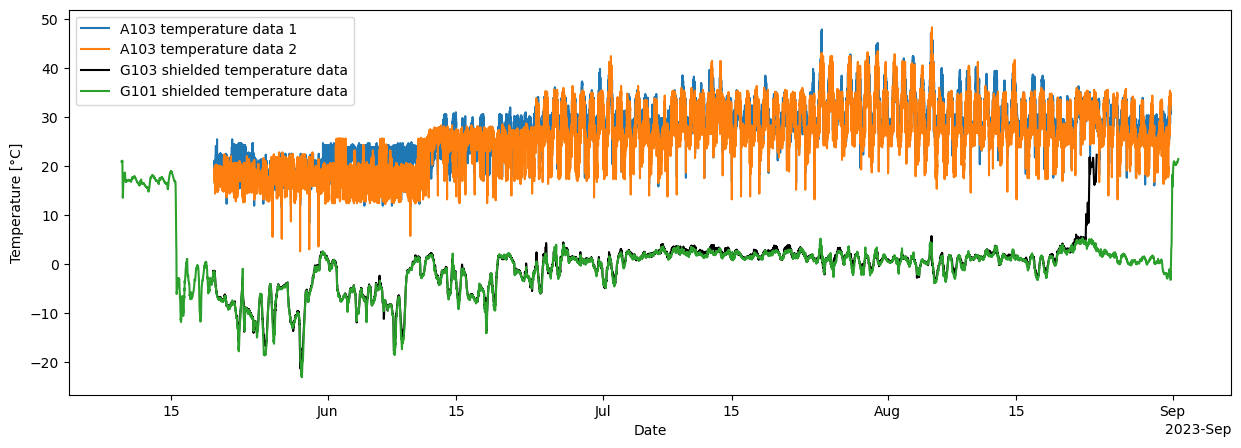

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
t13_1.plot(label='A103 temperature data 1')
t13_2.plot(label='A103 temperature data 2')
plt.plot(summer_time.values,summer_temp.values,color='k',label='G103 shielded temperature data')
plt.plot(summer_time1.values,summer_temp1.values, label='G101 shielded temperature data')

#((t13_1+t13_2)/2).plot()
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°C]')

In [22]:
v14,t14_1,t14_2 = load_v_t(ds_14_s)

Text(0, 0.5, 'Temperature [°C]')

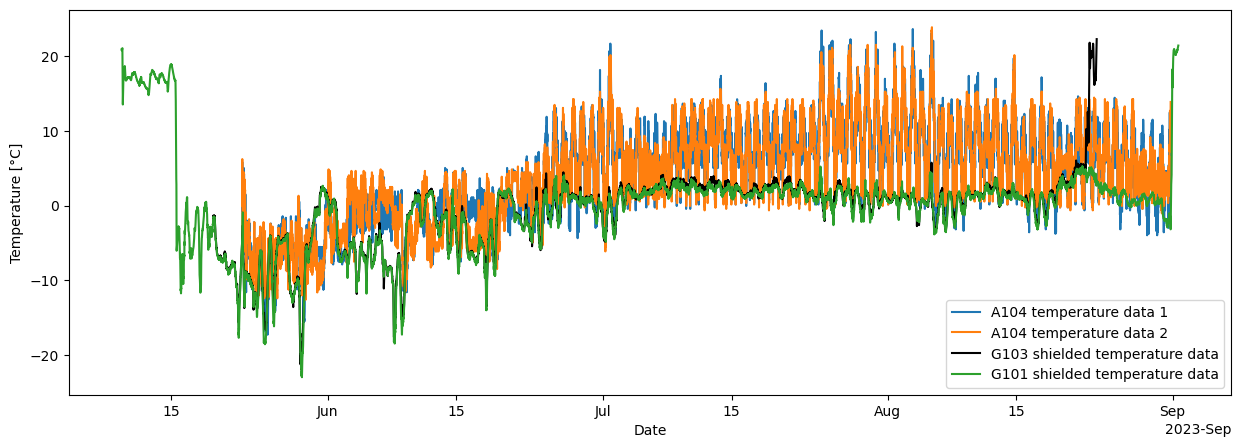

In [23]:
fig, ax = plt.subplots(figsize=(15,5))
t14_1.plot(label='A104 temperature data 1')
t14_2.plot(label='A104 temperature data 2')
plt.plot(summer_time.values,summer_temp.values,color='k',label='G103 shielded temperature data')
plt.plot(summer_time1.values,summer_temp1.values, label='G101 shielded temperature data')

#((t13_1+t13_2)/2).plot()
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Temperature [°C]')

In [24]:
with open('../chirp_processing/A13_23S.pickle', 'rb') as handle:
    summer = pickle.load(handle)

(19507.0, 19538.0)

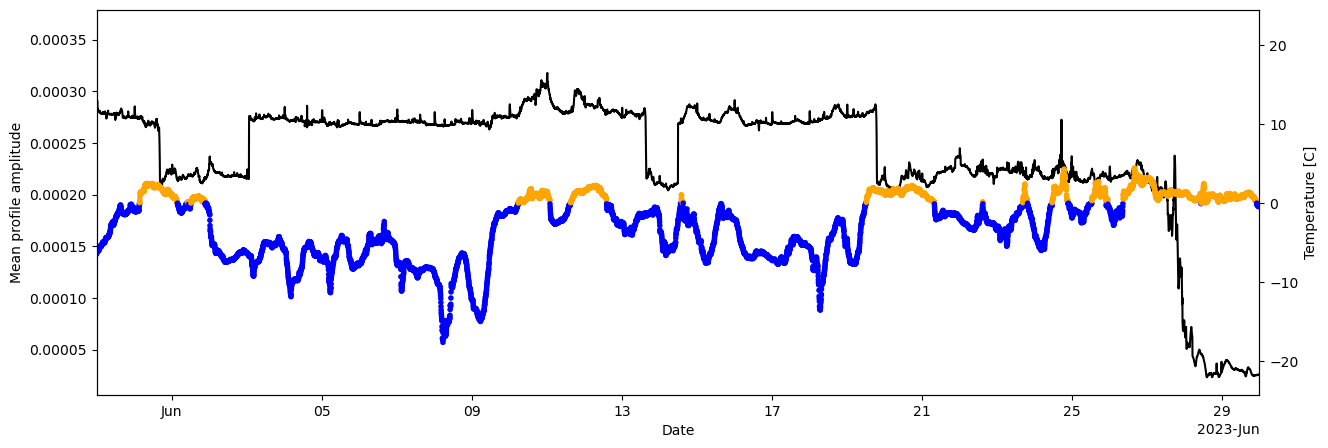

In [25]:
mean_amp = abs(summer).mean(dim='profile_range')
col_temp = np.where(summer_temp.values>0,'orange','blue')
#mean_amp.plot()
fig, axs = plt.subplots(nrows=1,figsize=(15,5),sharex=True)
mean_amp.plot(color='k')
#mean_amp.plot.scatter(c=col, marker='o',edgecolors='none',zorder=2)
ax2 = axs.twinx()
ax2.scatter(summer_time.values,summer_temp.values,marker='.',c=col_temp,zorder=0)
axs.set_ylabel('Mean profile amplitude')
axs.set_xlabel('Date')
ax2.set_ylabel('Temperature [C]')
axs.set_xlim([date(2023, 5, 30), date(2023, 6, 30)])


In [26]:
with open('../chirp_processing/A14_23S.pickle', 'rb') as handle:
    summer = pickle.load(handle)

(19507.0, 19538.0)

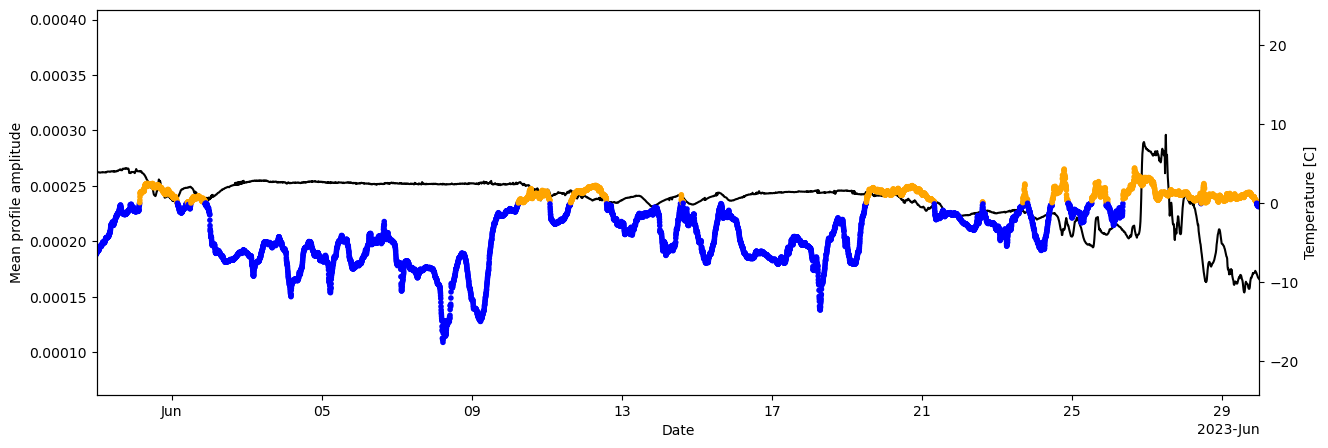

In [27]:
mean_amp = abs(summer).mean(dim='profile_range')
col_temp = np.where(summer_temp.values>0,'orange','blue')
#mean_amp.plot()
fig, axs = plt.subplots(nrows=1,figsize=(15,5),sharex=True)
mean_amp.plot(color='k')
#mean_amp.plot.scatter(c=col, marker='o',edgecolors='none',zorder=2)
ax2 = axs.twinx()
ax2.scatter(summer_time.values,summer_temp.values,marker='.',c=col_temp,zorder=0)
axs.set_ylabel('Mean profile amplitude')
axs.set_xlabel('Date')
ax2.set_ylabel('Temperature [C]')
axs.set_xlim([date(2023, 5, 30), date(2023, 6, 30)])


In [28]:
def strain_metrics(ds, win_cor, step, lag, noise_floor):
    # This function, given a window, and step, gives a total percentage of data that has high coherence
    b1 = ds.isel(time=range(0,len(ds)-lag))
    b2 = ds.isel(time=range(lag,len(ds)))
    dz, co, phi = xa.generate_range_diff(b1,b2,win_cor,step,None,0,0.95)
    dz=dz.assign(coherence=(['time','profile_range'],co))
    dz_new = dz.where(abs(dz.coherence) > 0.95).drop_duplicates('time')

    vv = dz_new.range_diff / dz_new.time_diff * 31536000
    vv_err = dz_new.err / dz_new.time_diff * 31536000
    fit=vv.where(vv.profile_range <=noise_floor).polyfit('profile_range',1,full=True)
    r2 = 1-fit.polyfit_residuals/((vv.where(vv.profile_range <=noise_floor)-vv.where(vv.profile_range <=noise_floor).mean())**2).sum(dim='profile_range')
    
    slope = fit.polyfit_coefficients.sel(degree=1)*vv.profile_range+fit.polyfit_coefficients.sel(degree=0)
    residual = vv-slope
    residual = residual.where(residual.profile_range <=noise_floor,drop=True)
    slope_errs = np.sqrt((1/(len(residual.profile_range)-2))*(((residual**2).sum(dim='profile_range'))/((residual.profile_range - residual.profile_range.mean())**2).sum()))

    return np.count_nonzero(abs(co)>0.95)/np.count_nonzero(co),np.mean(r2).values,[vv,vv_err,fit,r2,slope_errs]

def optimal_window_and_leapfrog(ds,noise_floor):
    max_score = 0
    windows = np.arange(20,90,20)
    lags = np.round(np.logspace(0,3,4)).astype('int')
    co_mat = np.zeros((len(windows),len(lags)))
    r2_mat = np.zeros((len(windows),len(lags)))
    for i in range(len(windows)):
        step = windows[i] # earlier experiments show step doesn't change results by much
        #for step in [10,20,40,80]:
        #    if step <= window:
        for j in range(len(lags)):
            count,r2,res = strain_metrics(ds, windows[i], step,lags[j],noise_floor)
            print(f"Window {windows[i]}, lag {lags[j]} -> frac high co {count:.2}, r2 {r2:.2}")
            co_mat[i,j] = count
            r2_mat[i,j]=r2
            # mean coherence not relevant I think
            temp_score = count+r2
            if temp_score > max_score:
                max_score = temp_score
                to_return = windows[i],lags[j],res
            
    fig, axs = plt.subplots(ncols=2,figsize=(15,5))
    plt0 = axs[0].pcolormesh(100*co_mat)
    plt.colorbar(plt0,ax=axs[0],label='fraction of data with |coherence|>0.95')
    axs[0].set_xticks(np.arange(co_mat.shape[1]) + 0.5, minor=False)
    axs[0].set_yticks(np.arange(co_mat.shape[0]) + 0.5, minor=False)
    axs[0].set_xticklabels(lags)
    axs[0].set_yticklabels(windows)
    axs[0].set_ylabel('Correlation window size [points included]')
    axs[0].set_xlabel('Lag between bursts [num. bursts seperated]')
    axs[0].set_title('fraction of data with high coherence')

    plt1 = axs[1].pcolormesh(r2_mat)
    plt.colorbar(plt1,ax=axs[1],label='Average r^2 of linear strain fits')
    axs[1].set_xticks(np.arange(r2_mat.shape[1]) + 0.5, minor=False)
    axs[1].set_yticks(np.arange(r2_mat.shape[0]) + 0.5, minor=False)
    axs[1].set_xticklabels(lags)
    axs[1].set_yticklabels(windows)
    axs[1].set_ylabel('Correlation window size [points included]')
    axs[1].set_xlabel('Lag between bursts [num. bursts seperated]')
    axs[1].set_title('Mean strain rate fit r-squared')

    return to_return
    
def plot_strain_fit(res,xlims=None,ylims=None):
    vv = res[0]
    vv_err = res[1]
    fit=res[2]
    r2 = res[3]
    slope_err = res[4]
    fig, ax = plt.subplots(figsize=(10,5))
    ax.errorbar(fit.time.values,fit.polyfit_coefficients.sel(degree=1).values,yerr=slope_err.values,linestyle='None',marker='.',ecolor='k')
    if ylims:
        ax.set_ylim(ylims)
    ax.set_ylabel('Strain rate [y$^{-1}$]')
    ax.set_title('Strain fitting results')
    ax.set_xlabel('Date')
    plt.yscale('symlog',linthresh=1e-2)

    fig1, axs_1 = plt.subplots(ncols=10,figsize=(19,5),sharey=True,layout='constrained')
    #fig1.suptitle('Strain fitting (\u03B5\u0307 in 10$^{-3}$ yr$^{-1}$)',fontsize=18)
    vv_times = np.arange(math.ceil(0.05*len(vv.time)),len(vv.time),len(vv.time)//10)
    for i in range(10):
        time = vv.time.isel(time = vv_times[i]).values
        axs_1[i].errorbar(vv.sel(time = time,method="nearest") ,vv.profile_range,yerr=None,xerr=vv_err.sel(time = time,method="nearest"),marker='.',linestyle='None',zorder=1)
        slope = fit.polyfit_coefficients.sel(degree=1).isel(time=vv_times[i]).values*np.linspace(20,600)+fit.polyfit_coefficients.sel(degree=0).isel(time=vv_times[i]).values

        axs_1[i].plot(slope,np.linspace(20,600),color='r',zorder=2)
        unit = ''#'x10$^{-3}$ yr$^{-1}$'
        #axs_1[plt_count].text(-10,300, f"\u03B5\u0307= {fit.polyfit_coefficients.sel(degree=1).isel(time=i).values*1000:.2g}"+unit,color = 'r',fontsize=14)
        axs_1[i].set_title(f'{time.astype(str)[:10]}')
        if xlims:
            axs_1[i].set_xlim(xlims)
        axs_1[i].set_ylim([20,1400])
        axs_1[i].tick_params(axis='both', which='major', labelsize=14)


    axs_1[0].invert_yaxis()

    axs_1[0].set_ylabel('depth [m]',fontsize=18)
    fig1.supxlabel('vertical velocity [m y$^{-1}$]',fontsize=18)

def plot_vv_2d(res,xlims=None):
    vv = res[0]
    vv_err = res[1]
    fit=res[2]
    r2 = res[3]
    fig, axs = plt.subplots(figsize=(20,10),nrows=2,sharex=True)
    plt1 = vv.plot(ax=axs[0],x='time',cmap='RdBu',vmin=-10,vmax=10)
    axs[0].invert_yaxis()
    axs[0].set_title('Vertical velocity estimate')
    axs[0].set_xlabel('')
    plt1.colorbar.set_label(label='vertical velocity [m y$^{-1}$]', size=14)

    plt2 = vv_err.plot(ax=axs[1],x='time',cmap='Blues')
    axs[1].invert_yaxis()
    axs[1].set_xlabel('Date')
    axs[1].set_title('Vertical velocity error')
    if xlims:
        plt.xlim(xlims)
    plt2.colorbar.set_label(label='vertical velocity error [m y$^{-1}$]', size=14)





In [29]:
with open('../chirp_processing/A11_22W.pickle', 'rb') as handle:
    winter = pickle.load(handle)

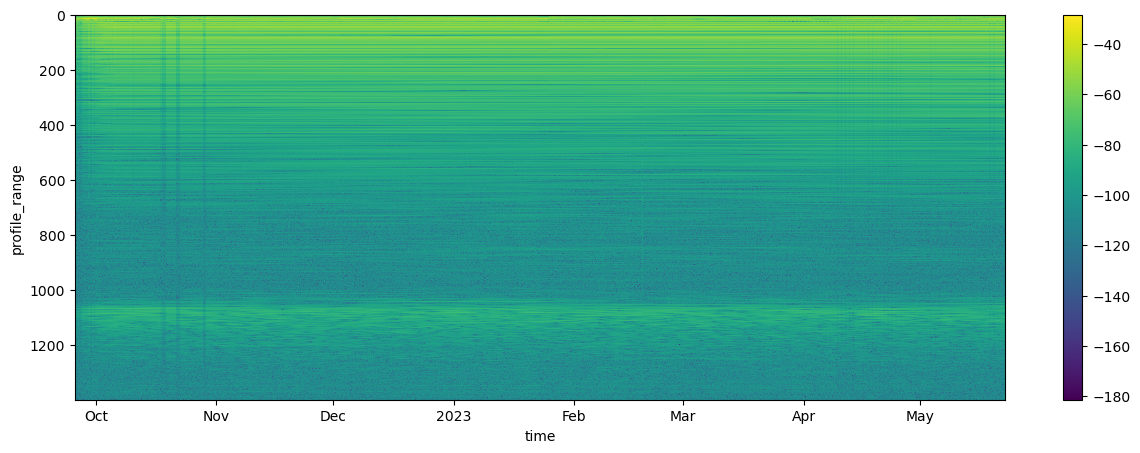

In [30]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(winter).plot(x='time')
ax.invert_yaxis()
#import datetime
#xlim=[datetime.date(2022, 12, 1), datetime.date(2023, 4, 1)]
#plt.xlim(xlim)

In [31]:
#time_to_interp = pd.date_range("2022-10-20 0:00", "2022-10-30 0:00", freq="15min")
time_to_interp = pd.date_range("2023-04-15 0:00", "2023-04-25 0:00", freq="15min")

interp_profiles = winter.interp(time=time_to_interp,method='linear')


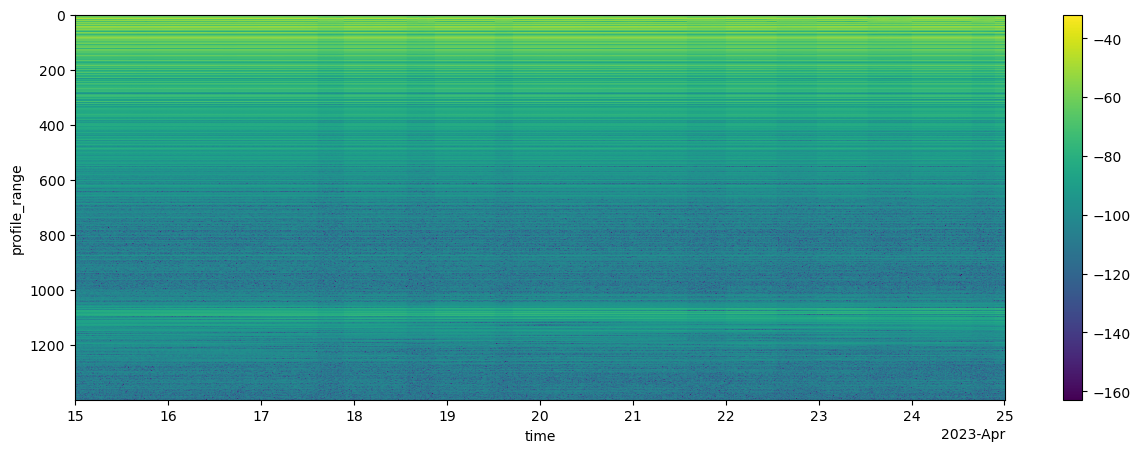

In [32]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(interp_profiles).plot(x='time')
ax.invert_yaxis()
#import datetime
#xlim=[datetime.date(2022, 12, 1), datetime.date(2023, 4, 1)]
#plt.xlim(xlim)

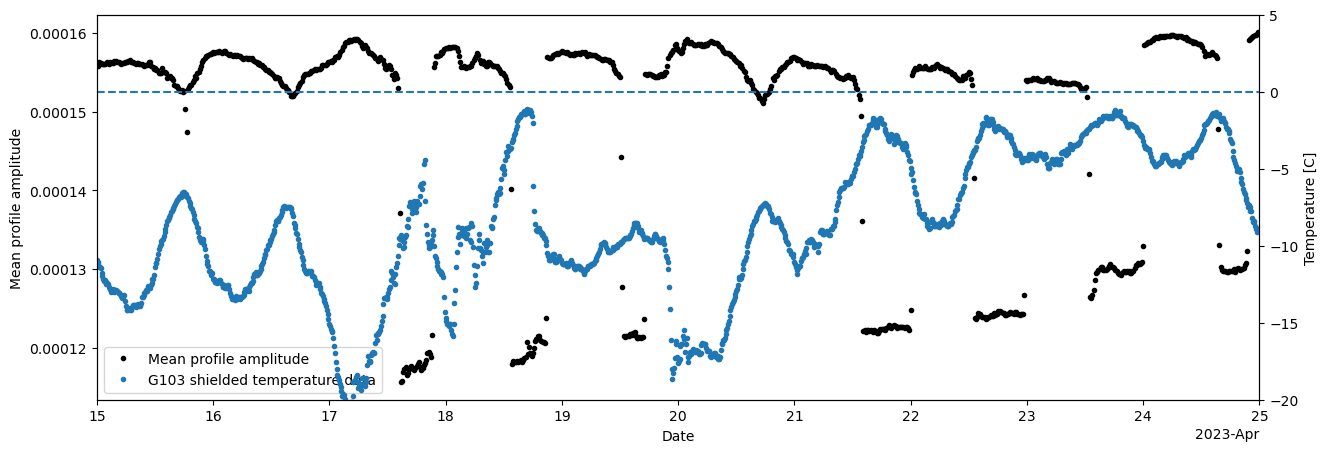

In [33]:
fig, axs = plt.subplots(nrows=1,figsize=(15,5),sharex=True)
l1 = abs(interp_profiles).mean(dim='profile_range').plot(ax=axs,color='k',linestyle='None',marker='.',label='Mean profile amplitude')
ax2 = axs.twinx()
l2 = ax2.plot(winter_time.values,winter_temp.values,linestyle='None',marker='.',label='G103 shielded temperature data')
ax2.axhline(0,linestyle='--')
ax2.set_xlim([date(2023, 4, 15), date(2023, 4, 25)])
ax2.set_ylim([-20,5])
axs.set_ylabel('Mean profile amplitude')
axs.set_xlabel('Date')
ax2.set_ylabel('Temperature [C]')
ls = l1+l2
labs = [l.get_label() for l in ls]
axs.legend(ls, labs)

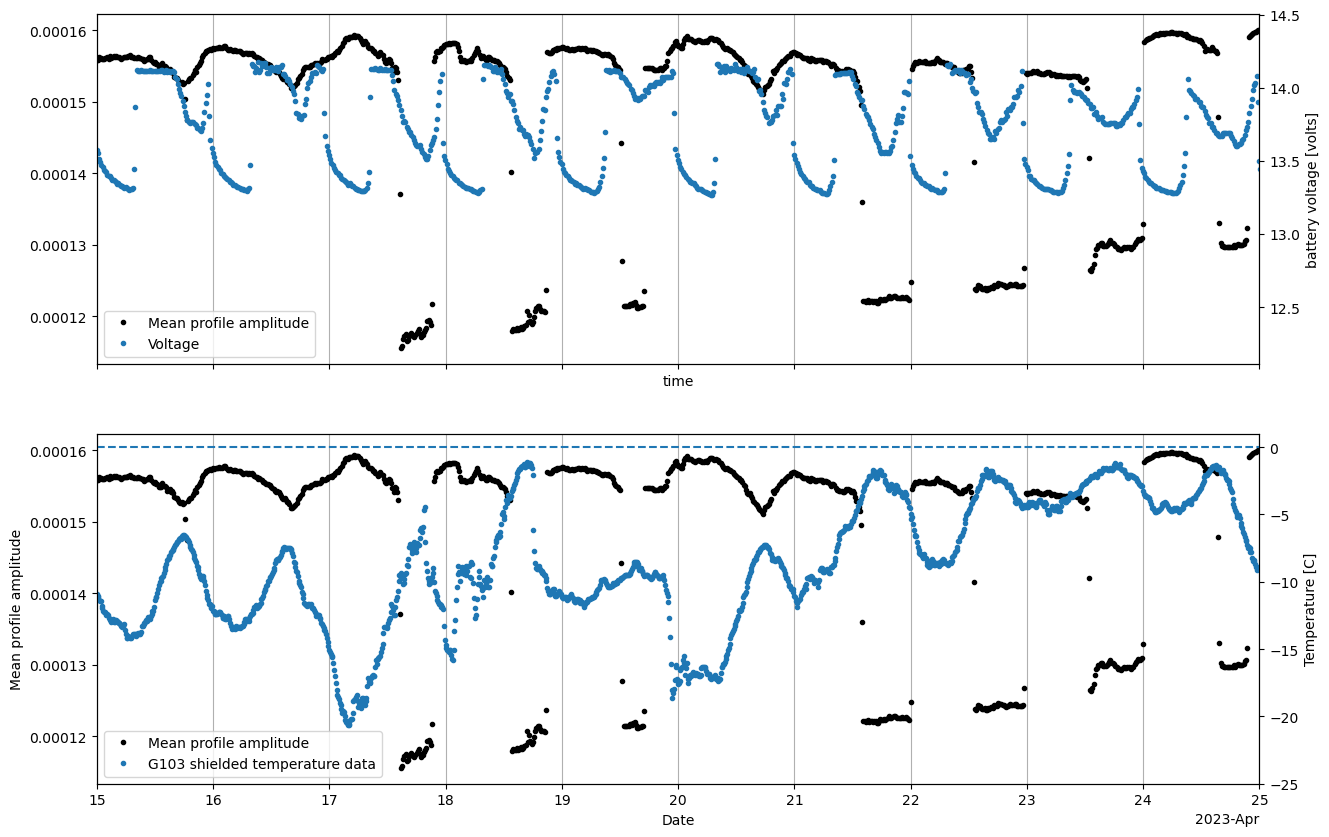

In [34]:
fig, axs = plt.subplots(nrows=2,figsize=(15,10),sharex=True)
l1 = abs(interp_profiles).mean(dim='profile_range').plot(ax=axs[0],color='k',linestyle='None',marker='.',label='Mean profile amplitude')
ax1 = axs[0].twinx()
l2 = v11.plot(ax=ax1,linestyle='None',marker='.',label='Voltage')
ls = l1+l2
labs = [l.get_label() for l in ls]
axs[0].legend(ls, labs)
axs[0].grid(axis = 'x')

l1 = abs(interp_profiles).mean(dim='profile_range').plot(ax=axs[1],color='k',linestyle='None',marker='.',label='Mean profile amplitude')

ax2 = axs[1].twinx()
l2 = ax2.plot(winter_time.values,winter_temp.values,linestyle='None',marker='.',label='G103 shielded temperature data')
ax2.axhline(0,linestyle='--')
ax2.set_xlim([date(2023, 4, 15), date(2023, 4, 25)])
ax2.set_ylim([-25,1])
axs[1].set_ylabel('Mean profile amplitude')
axs[1].set_xlabel('Date')
ax2.set_ylabel('Temperature [C]')
ls = l1+l2
labs = [l.get_label() for l in ls]
axs[1].legend(ls, labs)
axs[1].grid(axis = 'x')



Look at smaller amplitudes

In [35]:
#time_to_interp = pd.date_range("2022-10-20 0:00", "2022-10-30 0:00", freq="15min")
time_to_interp = pd.date_range("2023-03-20 0:00", "2023-03-30 0:00", freq="15min")

interp_profiles = winter.interp(time=time_to_interp,method='linear')


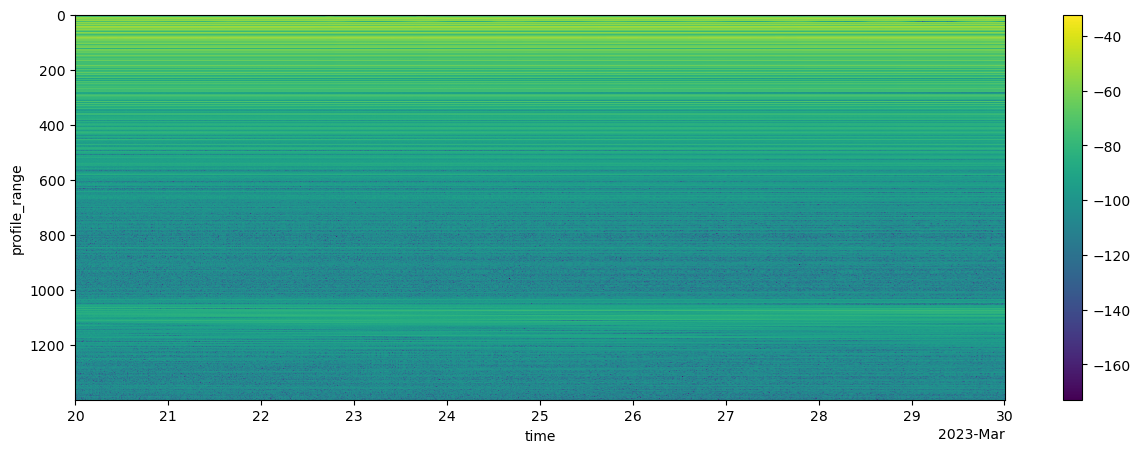

In [36]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(interp_profiles).plot(x='time')
ax.invert_yaxis()
#import datetime
#xlim=[datetime.date(2022, 12, 1), datetime.date(2023, 4, 1)]
#plt.xlim(xlim)

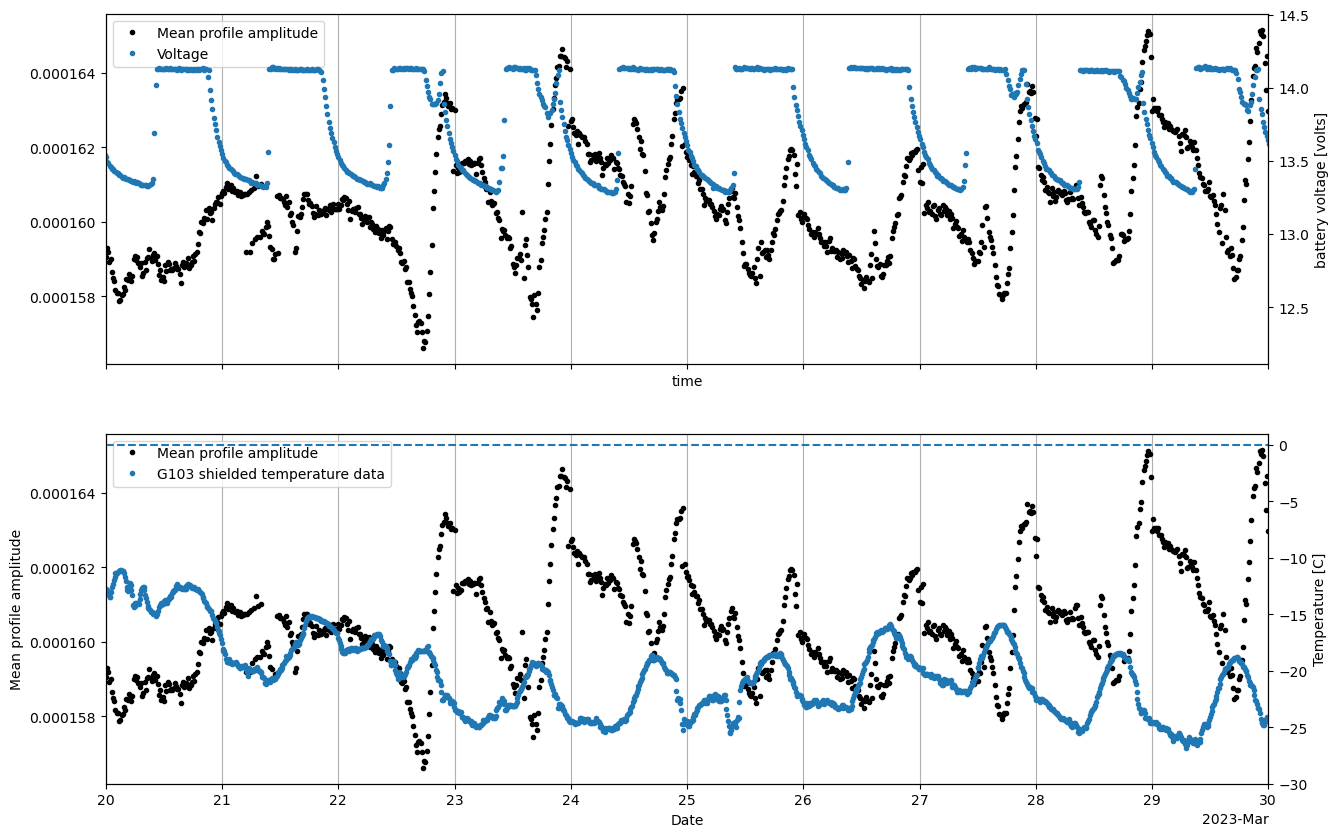

In [37]:
fig, axs = plt.subplots(nrows=2,figsize=(15,10),sharex=True)
l1 = abs(interp_profiles).mean(dim='profile_range').plot(ax=axs[0],color='k',linestyle='None',marker='.',label='Mean profile amplitude')
ax1 = axs[0].twinx()
l2 = v11.plot(ax=ax1,linestyle='None',marker='.',label='Voltage')
ls = l1+l2
labs = [l.get_label() for l in ls]
axs[0].legend(ls, labs)
axs[0].grid(axis = 'x')

l1 = abs(interp_profiles).mean(dim='profile_range').plot(ax=axs[1],color='k',linestyle='None',marker='.',label='Mean profile amplitude')

ax2 = axs[1].twinx()
l2 = ax2.plot(winter_time.values,winter_temp.values,linestyle='None',marker='.',label='G103 shielded temperature data')
ax2.axhline(0,linestyle='--')
ax2.set_xlim([date(2023, 3, 20), date(2023, 3, 30)])
ax2.set_ylim([-30,1])
axs[1].set_ylabel('Mean profile amplitude')
axs[1].set_xlabel('Date')
ax2.set_ylabel('Temperature [C]')
ls = l1+l2
labs = [l.get_label() for l in ls]
axs[1].legend(ls, labs)
axs[1].grid(axis = 'x')



In [38]:
mean_amp = abs(winter).mean(dim='profile_range')
mean_amp_mean = mean_amp.mean()
mean_amp_std = mean_amp.std()

In [39]:
col = np.where(mean_amp<mean_amp_mean-mean_amp_std,'r','k')

In [41]:
col_temp = np.where(winter_temp.values>0,'orange','blue')

Text(0, 0.5, 'Temperature [C]')

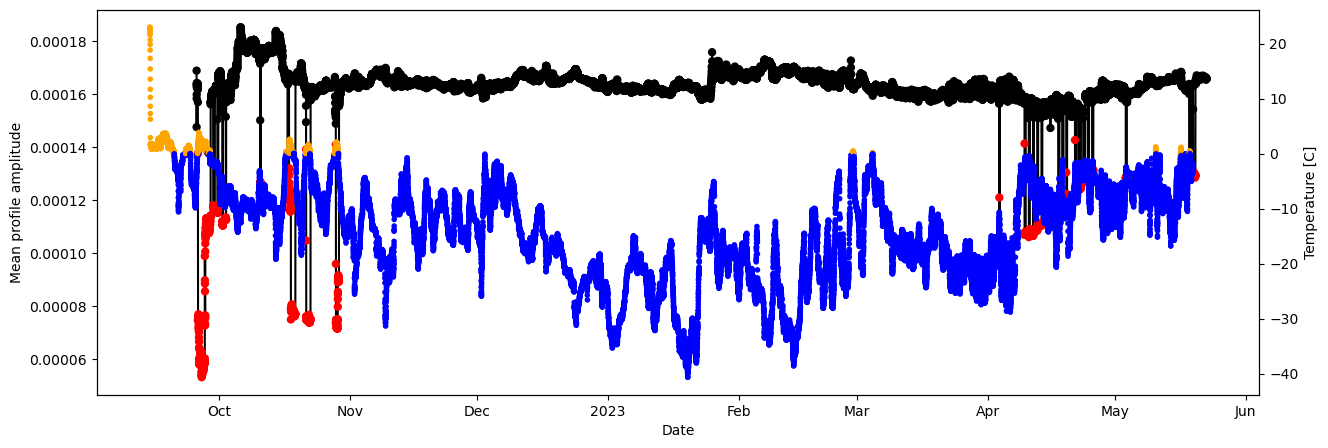

In [42]:
#mean_amp.plot()
fig, axs = plt.subplots(nrows=1,figsize=(15,5),sharex=True)
mean_amp.plot(color='k')
mean_amp.plot.scatter(c=col, marker='o',edgecolors='none',zorder=2)
ax2 = axs.twinx()
ax2.scatter(winter_time.values,winter_temp.values,marker='.',c=col_temp,zorder=0)
axs.set_ylabel('Mean profile amplitude')
axs.set_xlabel('Date')
ax2.set_ylabel('Temperature [C]')

In [ ]:
fig, axs = plt.subplots(nrows=1,figsize=(15,5),sharex=True)

low_amp_times = mean_amp.where(mean_amp<mean_amp_mean-mean_amp_std,drop=True).time.values
plt.plot(low_amp_times,np.ones(low_amp_times.shape),marker='.',linestyle='None')
high_temp_indices = [i for i in range(len(temps.values)) if temps.values[i] > 0]
high_temp_times = times_utc.values[high_temp_indices]
plt.plot(high_temp_times,2*np.ones(high_temp_times.shape),marker='.',linestyle='None')

high_temp_indices = [i for i in range(len(temps.values)) if temps.values[i] > -1]
high_temp_times = times_utc.values[high_temp_indices]
plt.plot(high_temp_times,3*np.ones(high_temp_times.shape),marker='.',linestyle='None')

high_temp_indices = [i for i in range(len(temps.values)) if temps.values[i] > -2]
high_temp_times = times_utc.values[high_temp_indices]
plt.plot(high_temp_times,4*np.ones(high_temp_times.shape),marker='.',linestyle='None')
plt.ylim([0,5])

Repeat with A13

In [ ]:
with open('../chirp_processing/A13_22W.pickle', 'rb') as handle:
    winter = pickle.load(handle)

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(winter).plot(x='time')
ax.invert_yaxis()
#import datetime
#xlim=[datetime.date(2022, 12, 1), datetime.date(2023, 4, 1)]
#plt.xlim(xlim)

In [ ]:
#time_to_interp = pd.date_range("2022-10-20 0:00", "2022-10-30 0:00", freq="15min")
time_to_interp = pd.date_range("2023-04-15 0:00", "2023-04-25 0:00", freq="15min")

interp_profiles = winter.interp(time=time_to_interp,method='linear')


In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(interp_profiles).plot(x='time')
ax.invert_yaxis()
#import datetime
#xlim=[datetime.date(2022, 12, 1), datetime.date(2023, 4, 1)]
#plt.xlim(xlim)

In [ ]:
fig, axs = plt.subplots(nrows=1,figsize=(15,5),sharex=True)
l1 = abs(interp_profiles).mean(dim='profile_range').plot(ax=axs,color='k',linestyle='None',marker='.',label='Mean profile amplitude')
ax2 = axs.twinx()
l2 = ax2.plot(winter_time.values,winter_temp.values,linestyle='None',marker='.',label='G103 shielded temperature data')
ax2.axhline(0,linestyle='--')
ax2.set_xlim([date(2023, 4, 15), date(2023, 4, 25)])
ax2.set_ylim([-20,5])
axs.set_ylabel('Mean profile amplitude')
axs.set_xlabel('Date')
ax2.set_ylabel('Temperature [C]')
ls = l1+l2
labs = [l.get_label() for l in ls]
axs.legend(ls, labs)

In [ ]:
fig, axs = plt.subplots(nrows=2,figsize=(15,10),sharex=True)
l1 = abs(interp_profiles).mean(dim='profile_range').plot(ax=axs[0],color='k',linestyle='None',marker='.',label='Mean profile amplitude')
ax1 = axs[0].twinx()
l2 = v13.plot(ax=ax1,linestyle='None',marker='.',label='Voltage')
ls = l1+l2
labs = [l.get_label() for l in ls]
axs[0].legend(ls, labs)
axs[0].grid(axis = 'x')

l1 = abs(interp_profiles).mean(dim='profile_range').plot(ax=axs[1],color='k',linestyle='None',marker='.',label='Mean profile amplitude')

ax2 = axs[1].twinx()
l2 = ax2.plot(winter_time.values,winter_temp.values,linestyle='None',marker='.',label='G103 shielded temperature data')
ax2.axhline(0,linestyle='--')
ax2.set_xlim([date(2023, 4, 15), date(2023, 4, 25)])
ax2.set_ylim([-25,1])
axs[1].set_ylabel('Mean profile amplitude')
axs[1].set_xlabel('Date')
ax2.set_ylabel('Temperature [C]')
ls = l1+l2
labs = [l.get_label() for l in ls]
axs[1].legend(ls, labs)
axs[1].grid(axis = 'x')



In [ ]:
mean_amp = abs(winter).mean(dim='profile_range')
mean_amp_mean = mean_amp.mean()
mean_amp_std = mean_amp.std()

In [ ]:
col = np.where(mean_amp<mean_amp_mean-mean_amp_std,'r','k')

In [ ]:
col.shape

In [ ]:
col_temp = np.where(temps.values>0,'orange','blue')

In [ ]:
#mean_amp.plot()
fig, axs = plt.subplots(nrows=1,figsize=(15,5),sharex=True)
mean_amp.plot(color='k')
#mean_amp.plot.scatter(c=col, marker='o',edgecolors='none',zorder=2)
ax2 = axs.twinx()
ax2.scatter(times_utc.values,temps.values,marker='.',c=col_temp,zorder=0)
axs.set_ylabel('Mean profile amplitude')
axs.set_xlabel('Date')
ax2.set_ylabel('Temperature [C]')

In [ ]:
fig, axs = plt.subplots(nrows=1,figsize=(15,5),sharex=True)

low_amp_times = mean_amp.where(mean_amp<mean_amp_mean-mean_amp_std,drop=True).time.values
plt.plot(low_amp_times,np.ones(low_amp_times.shape),marker='.',linestyle='None')
high_temp_indices = [i for i in range(len(temps.values)) if temps.values[i] > 0]
high_temp_times = times_utc.values[high_temp_indices]
plt.plot(high_temp_times,2*np.ones(high_temp_times.shape),marker='.',linestyle='None')

high_temp_indices = [i for i in range(len(temps.values)) if temps.values[i] > -1]
high_temp_times = times_utc.values[high_temp_indices]
plt.plot(high_temp_times,3*np.ones(high_temp_times.shape),marker='.',linestyle='None')

high_temp_indices = [i for i in range(len(temps.values)) if temps.values[i] > -2]
high_temp_times = times_utc.values[high_temp_indices]
plt.plot(high_temp_times,4*np.ones(high_temp_times.shape),marker='.',linestyle='None')
plt.ylim([0,5])

Repeat with A14

In [ ]:
with open('../chirp_processing/A14_22W.pickle', 'rb') as handle:
    winter = pickle.load(handle)

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(winter).plot(x='time')
ax.invert_yaxis()
#import datetime
#xlim=[datetime.date(2022, 12, 1), datetime.date(2023, 4, 1)]
#plt.xlim(xlim)

In [ ]:
time_to_interp = pd.date_range("2022-10-20 0:00", "2022-10-30 0:00", freq="15min")
interp_profiles = winter.interp(time=time_to_interp,method='linear')


In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
xa.dB(interp_profiles).plot(x='time')
ax.invert_yaxis()
#import datetime
#xlim=[datetime.date(2022, 12, 1), datetime.date(2023, 4, 1)]
#plt.xlim(xlim)

In [ ]:
fig, axs = plt.subplots(nrows=1,figsize=(15,5),sharex=True)
l1 = abs(interp_profiles).mean(dim='profile_range').plot(ax=axs,color='k',linestyle='None',marker='.',label='Mean profile amplitude')
ax2 = axs.twinx()
l2 = ax2.plot(times_utc.values,temps.values,linestyle='None',marker='.',label='G103 shielded temperature data')
ax2.axhline(0,linestyle='--')
ax2.set_xlim([date(2022, 10, 20), date(2022, 10, 30)])
ax2.set_ylim([-20,10])
axs.set_ylabel('Mean profile amplitude')
axs.set_xlabel('Date')
ax2.set_ylabel('Temperature [C]')
ls = l1+l2
labs = [l.get_label() for l in ls]
axs.legend(ls, labs)

In [ ]:
mean_amp = abs(winter).mean(dim='profile_range')
mean_amp_mean = mean_amp.mean()
mean_amp_std = mean_amp.std()

In [ ]:
col_temp = np.where(temps.values>0,'orange','blue')

In [ ]:
#mean_amp.plot()
fig, axs = plt.subplots(nrows=1,figsize=(15,5),sharex=True)
mean_amp.plot(color='k',linestyle='None',marker='.')
#mean_amp.plot.scatter(c=col, marker='o',edgecolors='none',zorder=2)
ax2 = axs.twinx()
ax2.scatter(times_utc.values,temps.values,marker='.',c=col_temp,zorder=0)
axs.set_ylabel('Mean profile amplitude')
axs.set_xlabel('Date')
ax2.set_ylabel('Temperature [C]')

In [ ]:
fig, axs = plt.subplots(nrows=1,figsize=(15,5),sharex=True)

low_amp_times = mean_amp.where(mean_amp<mean_amp_mean-mean_amp_std,drop=True).time.values
plt.plot(low_amp_times,np.ones(low_amp_times.shape),marker='.',linestyle='None')
high_temp_indices = [i for i in range(len(temps.values)) if temps.values[i] > 0]
high_temp_times = times_utc.values[high_temp_indices]
plt.plot(high_temp_times,2*np.ones(high_temp_times.shape),marker='.',linestyle='None')

high_temp_indices = [i for i in range(len(temps.values)) if temps.values[i] > -1]
high_temp_times = times_utc.values[high_temp_indices]
plt.plot(high_temp_times,3*np.ones(high_temp_times.shape),marker='.',linestyle='None')

high_temp_indices = [i for i in range(len(temps.values)) if temps.values[i] > -2]
high_temp_times = times_utc.values[high_temp_indices]
plt.plot(high_temp_times,4*np.ones(high_temp_times.shape),marker='.',linestyle='None')
plt.ylim([0,5])

# Amplitude and temperature trends

For each station and season, I will plot profile amplitudes vs temperatures

In [ ]:
# Load data
ds_11 = reload("A101")
ds_11 = ds_11.isel(time=range(20,len(ds_11.time))) # trim first few bursts, which were tests
ds_11_w = reload_winter("A101")
ds_11_s = reload_summer("A101")

ds_13 = reload("A103_fixed")
ds_13 = ds_13.isel(time=range(60,len(ds_13.time))) # trim first few bursts, which were tests
ds_13_w = reload_winter("A103")
ds_13_s = reload_summer("A103")
ds_13_s = ds_13_s.isel(time=range(100,len(ds_13_s.time)))

ds_14 = reload("A104")
ds_14 = ds_14.isel(time=range(50,len(ds_14.time))) # trim first few bursts, which were tests
ds_14_w = reload_winter("A104")
ds_14_s = reload_summer("A104")


In [5]:
def load_temps(ds):
    temp1 = ds.temperature_1
    true_temp1 = temp1.where(lambda x: x<300, temp1-512).compute()
    
    temp2 = ds.temperature_2
    true_temp2 = temp2.where(lambda x: x<300, temp2-512).compute()
    return (true_temp2+true_temp1)/2

In [6]:
def plot_temps_amps(profiles,temps):
    mean_amp = abs(profiles).mean(dim='profile_range')
    col_temp = np.where(temps.values>0,'orange','blue')
    fig, axs = plt.subplots(nrows=1,figsize=(15,5),sharex=True)
    mean_amp.plot(color='k',linestyle='None',marker='.',zorder=1)
    #mean_amp.plot.scatter(c=col, marker='o',edgecolors='none',zorder=2)
    ax2 = axs.twinx()
    ax2.scatter(temps.time.values,temps.values,marker='.',c=col_temp,zorder=0)
    axs.set_ylabel('Mean profile amplitude')
    axs.set_xlabel('Date')
    ax2.set_ylabel('Temperature [C]')

## A11

In [7]:
with open('../chirp_processing/A11_22S.pickle', 'rb') as handle:
    profiles = pickle.load(handle)

In [8]:
temps = load_temps(ds_11)

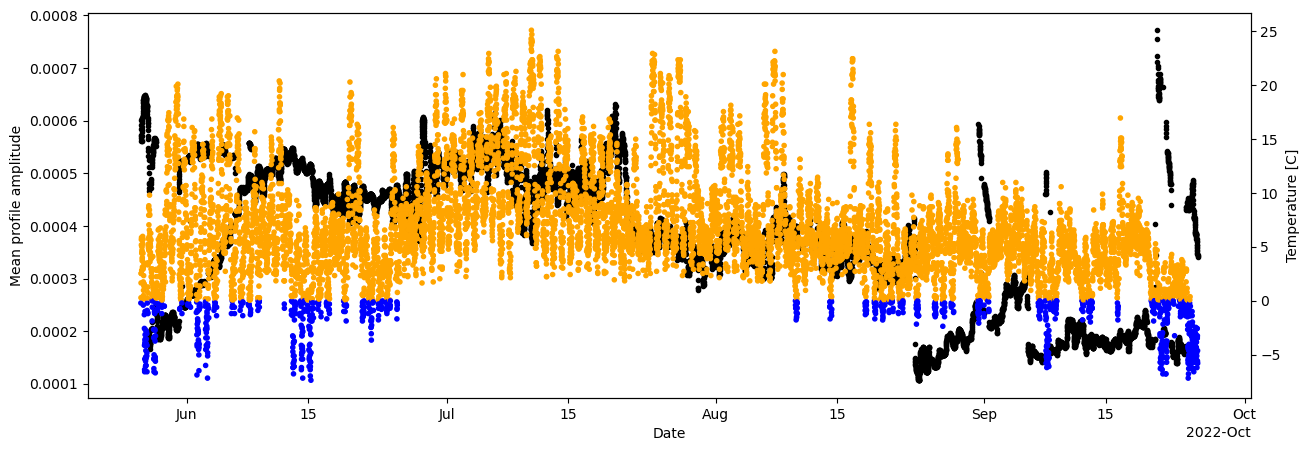

In [9]:
plot_temps_amps(profiles,temps)

Winter

In [10]:
with open('../chirp_processing/A11_22W.pickle', 'rb') as handle:
    profiles = pickle.load(handle)

In [11]:
temps = load_temps(ds_11_w)

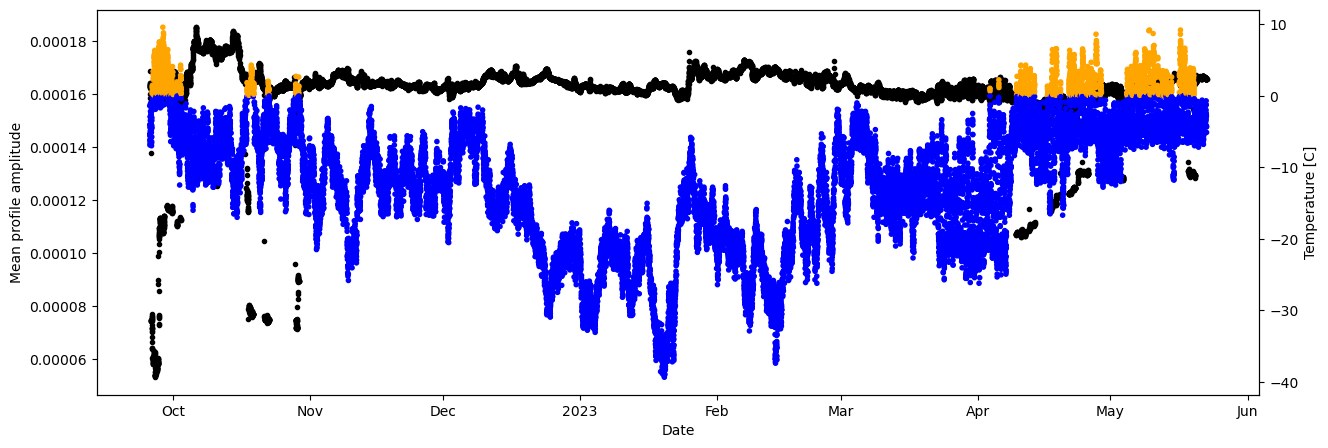

In [12]:
plot_temps_amps(profiles,temps)

## A13

In [13]:
with open('../chirp_processing/A13_22S.pickle', 'rb') as handle:
    profiles = pickle.load(handle)

In [14]:
temps = load_temps(ds_13)

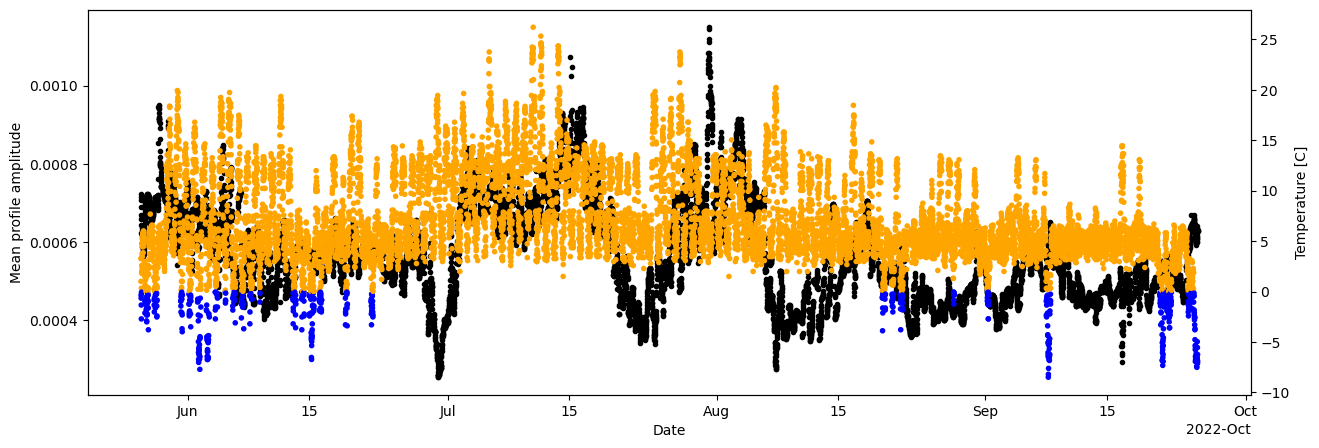

In [15]:
plot_temps_amps(profiles,temps)

Winter

In [16]:
with open('../chirp_processing/A13_22W.pickle', 'rb') as handle:
    profiles = pickle.load(handle)

In [17]:
temps = load_temps(ds_13_w)

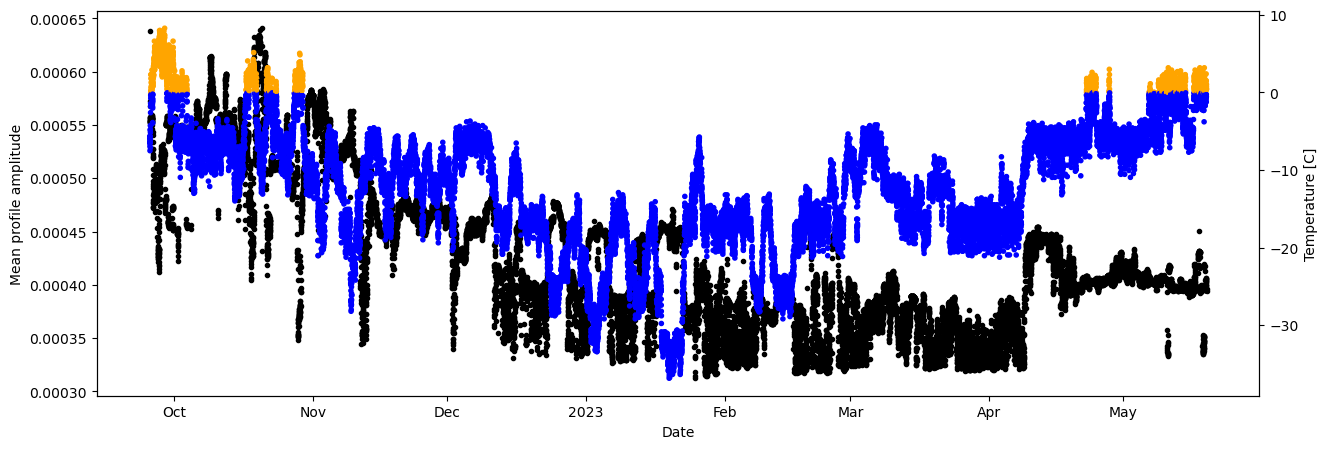

In [18]:
plot_temps_amps(profiles,temps)

Summer 2023

In [19]:
with open('../chirp_processing/A13_23S.pickle', 'rb') as handle:
    profiles = pickle.load(handle)

In [20]:
temps = load_temps(ds_13_s)

/srv/conda/envs/notebook/lib/python3.11/site-packages/distributed/client.py:3157: UserWarning: Sending large graph of size 13.97 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.11/site-packages/distributed/client.py:3157: UserWarning: Sending large graph of size 13.97 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


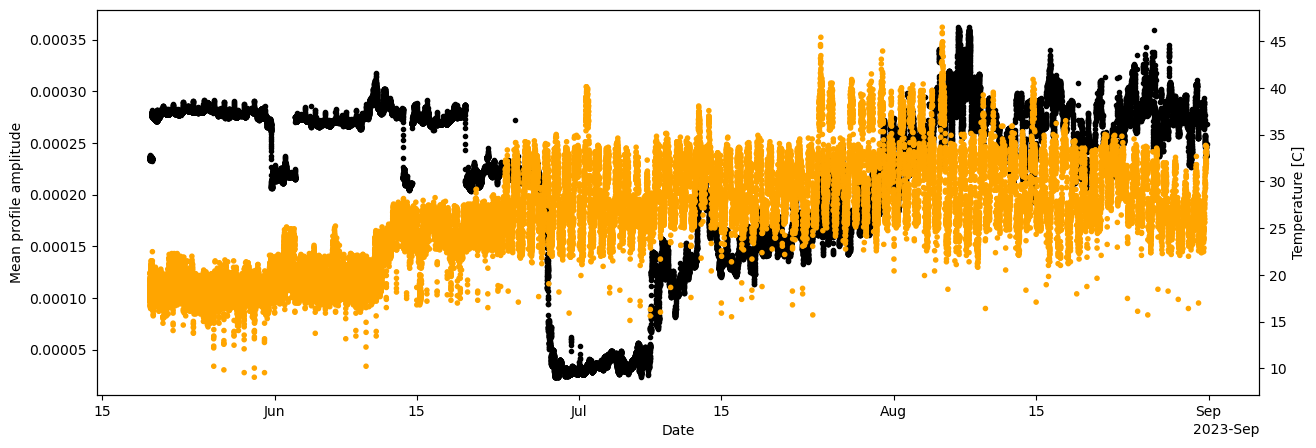

In [21]:
plot_temps_amps(profiles,temps)

## A14

In [22]:
with open('../chirp_processing/A14_22S.pickle', 'rb') as handle:
    profiles = pickle.load(handle)

In [23]:
temps = load_temps(ds_14)

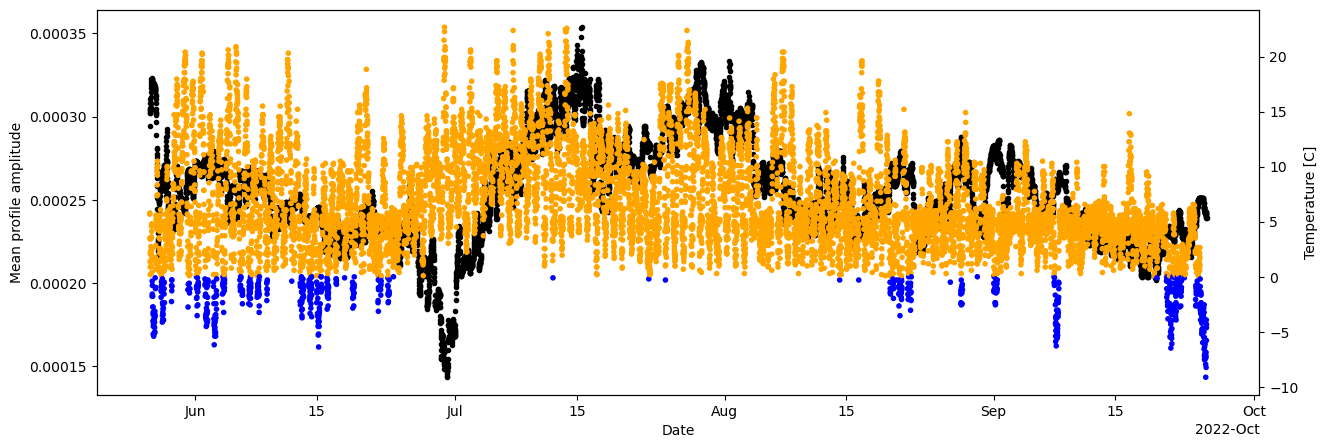

In [24]:
plot_temps_amps(profiles,temps)

Winter

In [25]:
with open('../chirp_processing/A14_22W.pickle', 'rb') as handle:
    profiles = pickle.load(handle)

In [26]:
temps = load_temps(ds_14_w)

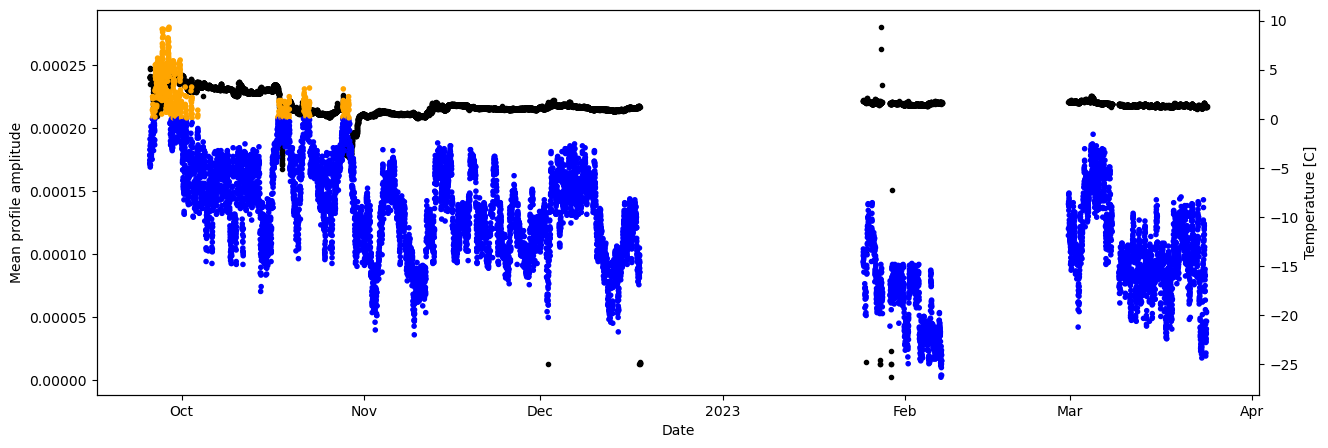

In [27]:
plot_temps_amps(profiles,temps)

Summer 2023

In [28]:
with open('../chirp_processing/A14_23S.pickle', 'rb') as handle:
    profiles = pickle.load(handle)

In [29]:
temps = load_temps(ds_14_s)

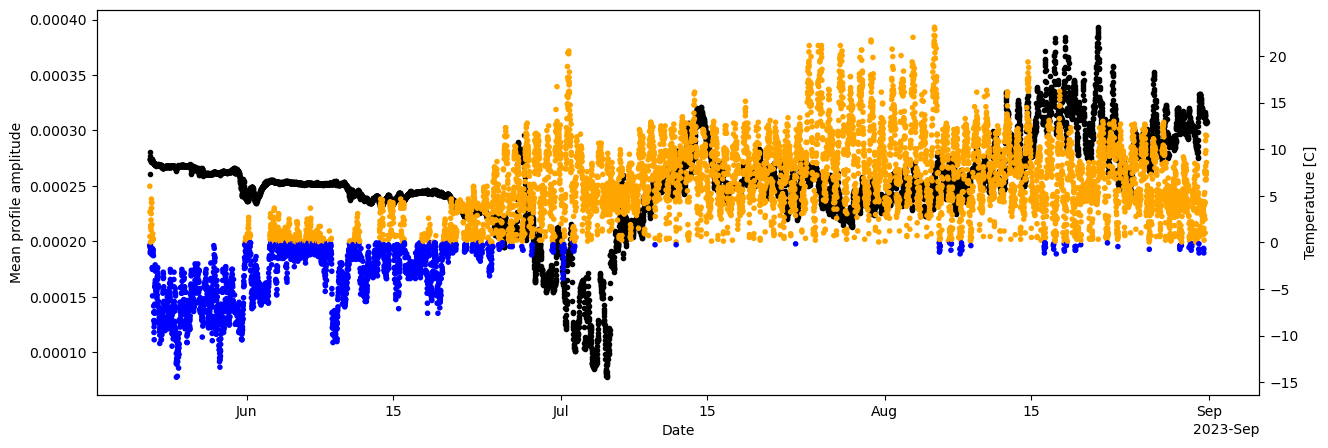

In [30]:
plot_temps_amps(profiles,temps)